In [1]:
import pandas as pd
import joblib
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# Load our pre-split data
data = joblib.load('../Results/split_data.joblib')
X_train = data['X_train']
X_test = data['X_test']
y_train = data['y_train']
y_test = data['y_test']

print("Training and testing data loaded successfully.")


Training and testing data loaded successfully.


In [2]:
# Initialize the XGBoost Classifier
# We use a scale_pos_weight to handle class imbalance, which is the standard for XGBoost
xgb_model = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the model on the full training data
print("Training the XGBoost model...")
xgb_model.fit(X_train, y_train)
print("Model training complete.")



Training the XGBoost model...


d:\Anaconda\envs\thesis_env\lib\site-packages\xgboost\training.py:183: UserWarning: [13:21:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Model training complete.


--- Classification Report (XGBoost Model) ---
              precision    recall  f1-score   support

           0       0.64      0.68      0.66        50
           1       0.48      0.44      0.46        34

    accuracy                           0.58        84
   macro avg       0.56      0.56      0.56        84
weighted avg       0.58      0.58      0.58        84


--- Confusion Matrix (XGBoost Model) ---
                Predicted: 0 | Predicted: 1
Actual: 0      34            | 16           
Actual: 1      19            | 15           

Random Forest ROC AUC Score: 0.5532
XGBoost ROC AUC Score: 0.5700

Plotting ROC Curve...


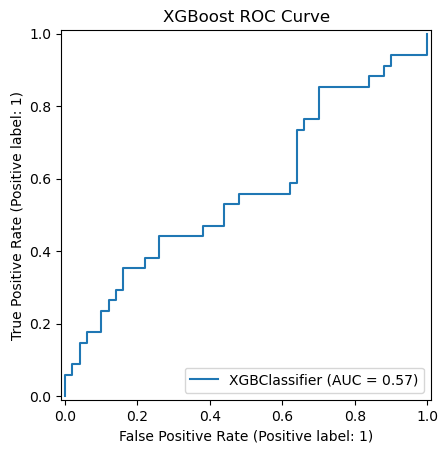

In [3]:
# Make predictions on the test set
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# --- Evaluation ---
print("--- Classification Report (XGBoost Model) ---")
print(classification_report(y_test, y_pred))

print("\n--- Confusion Matrix (XGBoost Model) ---")
cm = confusion_matrix(y_test, y_pred)
print("                Predicted: 0 | Predicted: 1")
print(f"Actual: 0      {cm[0,0]:<13} | {cm[0,1]:<13}")
print(f"Actual: 1      {cm[1,0]:<13} | {cm[1,1]:<13}")

roc_auc_xgb = roc_auc_score(y_test, y_pred_proba)
print(f"\nRandom Forest ROC AUC Score: 0.5532")
print(f"XGBoost ROC AUC Score: {roc_auc_xgb:.4f}")

# Plot the ROC Curve
print("\nPlotting ROC Curve...")
RocCurveDisplay.from_estimator(xgb_model, X_test, y_test)
plt.title('XGBoost ROC Curve')
plt.show()
